In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#opening up dataset

df = pd.read_csv('bank.csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
#creating dummy variables 
df['y'] = (df['y']=='yes').astype(int)
cat_vars = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'poutcome']
df = pd.get_dummies(df, columns=cat_vars)
print("Job columns:\n{}".format(',\n'.join([c for c in list(df) if c[:4]=="job_"])))


Job columns:
job_admin.,
job_blue-collar,
job_entrepreneur,
job_housemaid,
job_management,
job_retired,
job_self-employed,
job_services,
job_student,
job_technician,
job_unemployed,
job_unknown


In [8]:
#checking the data's shape
#checking the data's info

print("The shape of the dataset is", df.shape)
print("The general information of the dataset is as followed..")
df.info()

The shape of the dataset is (4119, 64)
The general information of the dataset is as followed..
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   duration                       4119 non-null   int64  
 2   campaign                       4119 non-null   int64  
 3   pdays                          4119 non-null   int64  
 4   previous                       4119 non-null   int64  
 5   emp.var.rate                   4119 non-null   float64
 6   cons.price.idx                 4119 non-null   float64
 7   cons.conf.idx                  4119 non-null   float64
 8   euribor3m                      4119 non-null   float64
 9   nr.employed                    4119 non-null   float64
 10  y                              4119 non-null   int64  
 11  job_admin.   

In [11]:
#feature selection - need to decide the best 12 columns using RFE
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
X0 = df.loc[:, df.columns != 'y']
Y0 = df['y']
selector = RFE(model, n_features_to_select=12, step=1)
selector = selector.fit(X0, Y0)
selected_features = X0.loc[:, selector.support_]
print("Selected features:\n{}".format(',\n'.join(list(selected_features))))

Selected features:
previous,
euribor3m,
job_retired,
job_technician,
job_unemployed,
month_dec,
month_jul,
month_jun,
month_mar,
month_may,
poutcome_failure,
poutcome_success


In [12]:
#inspect the contents of X0, Y0 and the selected_features feature
print("X0 (Feature Matrix):\n", X0)
print("\nY0 (Target Variable):\n", Y0)
print("\nSelected Features:\n", selected_features)

X0 (Feature Matrix):
       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0      30       487         2    999         0          -1.8          92.893   
1      39       346         4    999         0           1.1          93.994   
2      25       227         1    999         0           1.4          94.465   
3      38        17         3    999         0           1.4          94.465   
4      47        58         1    999         0          -0.1          93.200   
...   ...       ...       ...    ...       ...           ...             ...   
4114   30        53         1    999         0           1.4          93.918   
4115   39       219         1    999         0           1.4          93.918   
4116   27        64         2    999         1          -1.8          92.893   
4117   58       528         1    999         0           1.4          93.444   
4118   34       175         1    999         0          -0.1          93.200   

      cons.conf.i

In [13]:
#building the model using training set then testing it with the testing set 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

X = selected_features
Y = df['y']
# We split the dataset using stratification on y since y is unbalanced.
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.30, stratify = Y)
clf = LogisticRegression()
clf.fit(trainX, trainY)
predicted = clf.predict(testX)
print("1. Mean hits: {}".format(np.mean(predicted==testY)))
print("2. Accuracy score: {}".format(metrics.accuracy_score(testY,predicted)))
print("3. Test score: {}".format(clf.score(testX, testY)))
# 1., 2., 3. compute the same things.
scores = cross_val_score(clf, X, Y, scoring='accuracy',cv=8)
print("Cross validation mean scores: {}".format(scores.mean()))

1. Mean hits: 0.901294498381877
2. Accuracy score: 0.901294498381877
3. Test score: 0.901294498381877
Cross validation mean scores: 0.9007036001662196


AUC = 0.7739798836074948


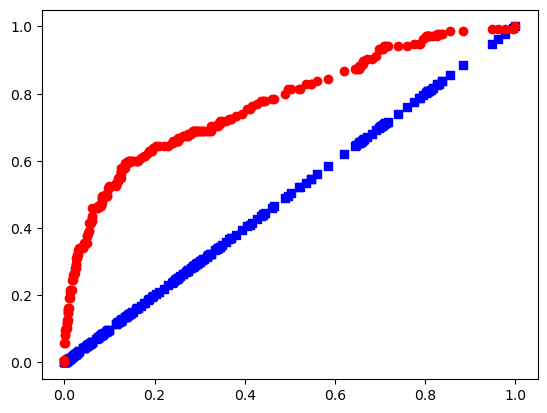

In [14]:
#plotting the ROC curve
import matplotlib.pyplot as plt
prob = np.array(clf.predict_proba(testX)[:, 1])
testY += 1
fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=2)
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))
plt.scatter(fpr, fpr, c='b', marker='s')
plt.scatter(fpr, sensitivity, c='r', marker='o')
plt.show()

In [15]:
#overfitted data - would need to tune parameters
from sklearn.ensemble import RandomForestClassifier
crf = RandomForestClassifier(n_jobs=-1, n_estimators=400, oob_score=True)
crf.fit(trainX,trainY)
print("Accuracy score for training data is: {:4.3f}".format(crf.score(trainX,
trainY)))
print("Accuracy score for test data: {:4.3f}".format(crf.score(testX, testY)))

Accuracy score for training data is: 0.943
Accuracy score for test data: 0.028


In [18]:
#cross validating both models
from sklearn.model_selection import KFold
crossvalidation = KFold(10, shuffle=True, random_state=0)
score1=cross_val_score(clf, X, Y,scoring='accuracy',cv=crossvalidation,n_jobs=-1)
print("X valiation score for Logistic regression is: {:5.4f}".format(np.mean(score1)))
score2=cross_val_score(crf, X, Y,scoring='accuracy',cv=crossvalidation,n_jobs=-1)
print("X validation score for Random Forest: {:5.4f}".format(np.mean(score2)))

X valiation score for Logistic regression is:0.9012
X validation score for Random Forest: 0.9000


In [19]:
#inspect the contents in the arrays score 1 and score 2
print("Score 1", score1) #logistic regression
print("Score 2", score2) #random forest

Score 1 [0.91019417 0.91262136 0.89320388 0.89805825 0.90776699 0.87378641
 0.91990291 0.90776699 0.88834951 0.90024331]
Score 2 [0.91747573 0.91019417 0.88592233 0.90048544 0.90291262 0.85679612
 0.91747573 0.91504854 0.8907767  0.9026764 ]
